# Lab 5: The Photoelectric Effect

Physics 202

Shreya Parjan + Alex G.

10/15/18

## Objective


### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import math as m
%matplotlib inline

## Part 1: Planck's Constant and the Work Function

### Data

In [3]:
#volts
voltage630 = np.array([.19,.11,.12,.11,.12])
voltage595 = np.array([.26,.25,.26,.29,.24])
voltage525 = np.array([.56,.56,.59,.54,.54])
voltage460 = np.array([.90,.82,.85,.89,.88])
voltage400 = np.array([1.25,1.33,1.38,1.25,1.29])
voltage380 = np.array([1.16,1.18,1.14,1.16,1.10])

#m
lled630 = 630e-9
lled595 = 595e-9
lled525 = 525e-9
lled460 = 460e-9
lled400 = 400e-9
lled380 = 380e-9

c = 3e8 #m/s

### Analysis

In [4]:
avgV0 = np.array([np.average(voltage630), np.average(voltage595), np.average(voltage525), np.average(voltage460), np.average(voltage400), np.average(voltage380)])
frequency = np.array([1/lled630, 1/lled595, 1/lled525, 1/lled460, 1/lled400, 1/lled380])*c
#print(frequency)
sigma = np.array([np.std(voltage630), np.std(voltage595), np.std(voltage525), np.std(voltage460), np.std(voltage400), np.std(voltage380)])
#print(sigma)
sigmaBar = np.std(avgV0)
#print(sigmaBar)

x-intercept =  426535294188251.06
y-intercept =  -1.5357706726802571
slope =  3.600571145239029e-15
max lambda =  7.033415618534845e-07
the max wavelength that will eject electrons is 703 nm
uncertainties:  [2.48093320e-01 3.90758163e-16]


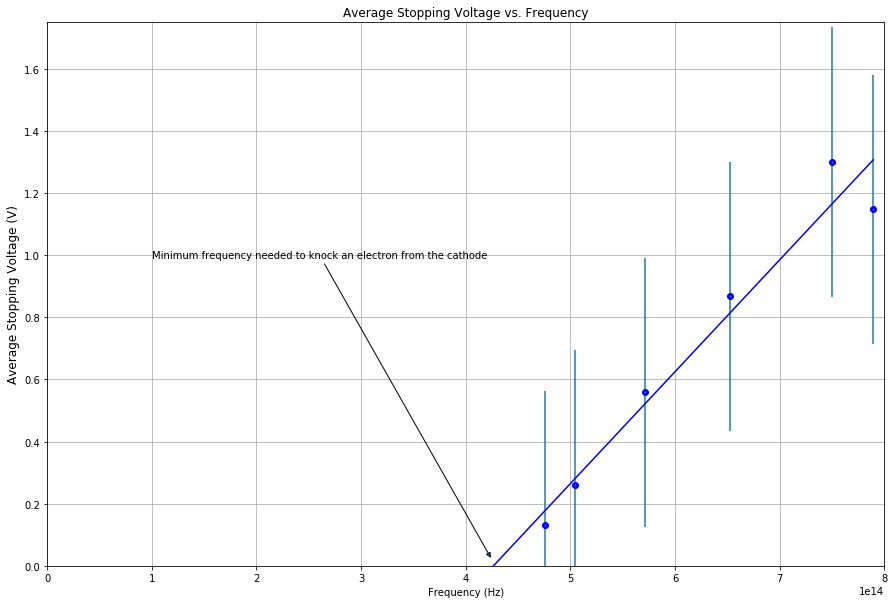

In [5]:
fig = plt.figure(figsize=(15,10))
plt.grid(True)
plt.errorbar(frequency,avgV0,yerr=sigmaBar,fmt='o',markersize=1)
def straight_line_model(x, A, B):
    return A + B * x

popt, pcov = scipy.optimize.curve_fit(straight_line_model, frequency, avgV0)
yIntercept = popt[0]
slope = popt[1]
xIntercept = (-1)*yIntercept/slope
maxLambda = c/xIntercept
print('x-intercept = ',xIntercept)
print('y-intercept = ',yIntercept)
print('slope = ',slope)
print('max lambda = ',maxLambda)
print('the max wavelength that will eject electrons is 703 nm')

frequency_for_plot = np.linspace(3e14, frequency.max(), 50)
best_fit_line = straight_line_model(frequency_for_plot, popt[0], popt[1])

#calculates uncertainties for both variables
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)


plt.annotate('Minimum frequency needed to knock an electron from the cathode', xy=(4.25e14,.02), xytext=(1e14,1), arrowprops={'arrowstyle': '-|>'}, va='center')

plt.plot(frequency, avgV0, 'bo') #without '-' after bo, plots points alone
plt.plot(frequency_for_plot, best_fit_line, 'b') # adds best fit line

plt.xlabel('Frequency (Hz)') # label the x-axis
plt.ylabel('Average Stopping Voltage (V)', size=12) # label the y-axis
plt.ylim(0,1.75)
plt.xlim(0,8e14)

plt.title('Average Stopping Voltage vs. Frequency') # title
plt.show()

## Part 2

x-intercept =  2.88028168072499
y-intercept =  0.8610526318661456
slope =  -0.2989473694980457
uncertainties:  [0.03191679 0.09480699]


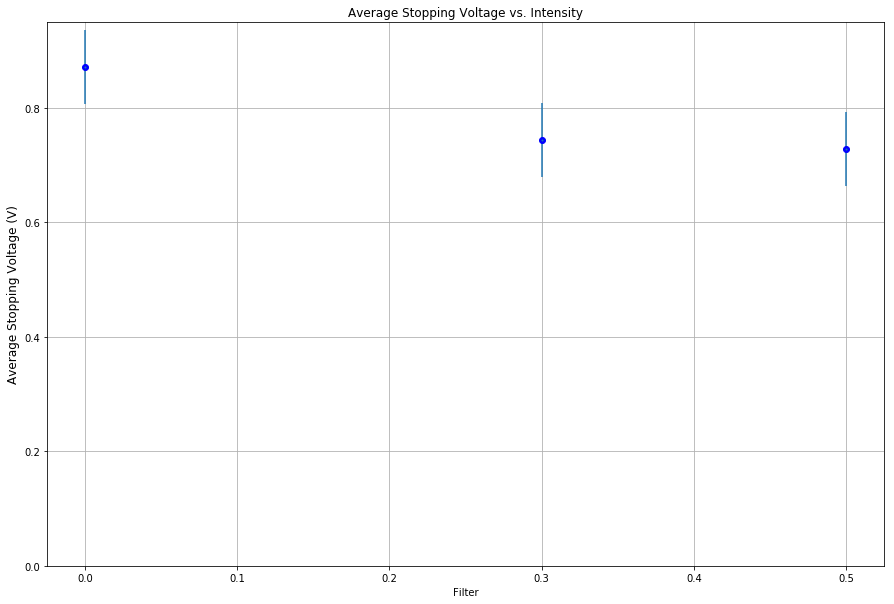

In [6]:
filterV0 = np.array([.88,.88,.86,.84,.9])
filterV3 = np.array([.76,.73,.73,.75,.75])
filterV5 = np.array([.73,.73,.7,.73,.75])
filters = np.array([0,.3,.5])

avgV0 = np.mean(filterV0) #V
avgV3 = np.mean(filterV3)
avgV5 = np.mean(filterV5)
avgV = np.array([avgV0,avgV3,avgV5])

sigma = np.array([np.std(avgV0),np.std(avgV3),np.std(avgV5)])
sigmaBar = np.std(avgV)

fig = plt.figure(figsize=(15,10))
plt.grid(True)
plt.errorbar(filters,avgV,yerr=sigmaBar,fmt='o',markersize=1)
def straight_line_model(x, A, B):
    return A + B * x

popt, pcov = scipy.optimize.curve_fit(straight_line_model, filters, avgV)
yIntercept = popt[0]
slope = popt[1]
xIntercept = (-1)*yIntercept/slope
#maxLambda = c/xIntercept
print('x-intercept = ',xIntercept)
print('y-intercept = ',yIntercept)
print('slope = ',slope)
#print('the max wavelength that will eject electrons is',maxLambda," m")

filters_for_plot = np.linspace(3e14, filters.max(), 50)
best_fit_line = straight_line_model(filters_for_plot, popt[0], popt[1])

#calculates uncertainties for both variables
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)


#plt.annotate('Minimum frequency needed to knock an electron from the cathode', xy=(4.25e14,.02), xytext=(1e14,1), arrowprops={'arrowstyle': '-|>'}, va='center')

plt.plot(filters, avgV, 'bo') #without '-' after bo, plots points alone
#plt.plot(filters_for_plot, best_fit_line, 'b') # adds best fit line

plt.xlabel('Filter') # label the x-axis
plt.ylabel('Average Stopping Voltage (V)', size=12) # label the y-axis
plt.ylim(0,.95)
#plt.xlim(0,8e14)

plt.title('Average Stopping Voltage vs. Intensity') # title
plt.show()

Text(0.5,1,'Photocurrent Voltage v. Filter')

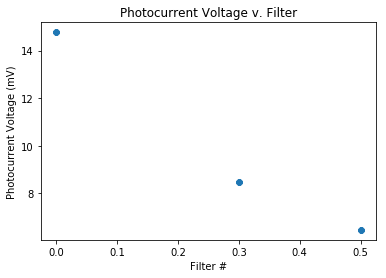

In [7]:
photo = np.array([14.77, 8.49,6.47]) #mV

plt.plot(filters, photo, '8', label='Filters v. Photocurrent')
popt, pcov = scipy.optimize.curve_fit(straight_line_model, filters, photo)
plt.xlabel('Filter #')
plt.ylabel('Photocurrent Voltage (mV)')
plt.title('Photocurrent Voltage v. Filter')

### Questions
1. Our value for h (Planck's constant) is: h = (3.6 +/- 0.4)*10^-15 eV*s.
2. This does not agree with the accepted value for Planck's constant (h = 4.136 x 10-15 eV*s).
3. The max wavelength that will eject electrons is about 700 nm.
4. Our data suggests that as intensity increases, there is little change in the stopping voltage while classically, V0 should be proportional to intensity.
5. Photocurrent seems approximately proportional to intensity.
6. Classically, we'd expect the stopping voltage and photocurrent to depend on the intensity of light but our results indicated that there is little change in the stopping voltage with increasing intensity. We would also not expect there to be a maximum wavelength that ejects an electron.